### Load Training data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pickle
import os
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
output_folder = '/home/stephane/Playground/PycharmProjects/machine-learning/Classification/DataPrep/output/'

In [17]:
files_mappings_df = pd.read_hdf(path_or_buf=os.path.join(output_folder, 'train/files_mappings_df.hd5'), key='files_mappings')
files_mappings_df.head()

,development aid,international co-operation,aid coordination,aid institutions,development agencies,needs assessment,terms of aid,foreign aid,international organisations,regional co-operation,...,authority,appeal,award of contract,judgements,dispositions,parties,regulatory co-operation,trade costs,social media,0
JT03336861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
JT03375495,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
JT03376187,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
JT03328827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
JT03319247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [10]:
files_mappings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, JT03336861 to JT03374028
Columns: 2244 entries, development aid to 0
dtypes: int8(2244)
memory usage: 1.7+ MB


In [28]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

X, y = files_mappings_df.loc[:, 'development aid':'social media'], files_mappings_df.iloc[:, 2243:2244]

In [19]:
X.shape

(802, 2243)

In [35]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=29, 
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(X)

In [25]:
y_km.view().shape

(802,)

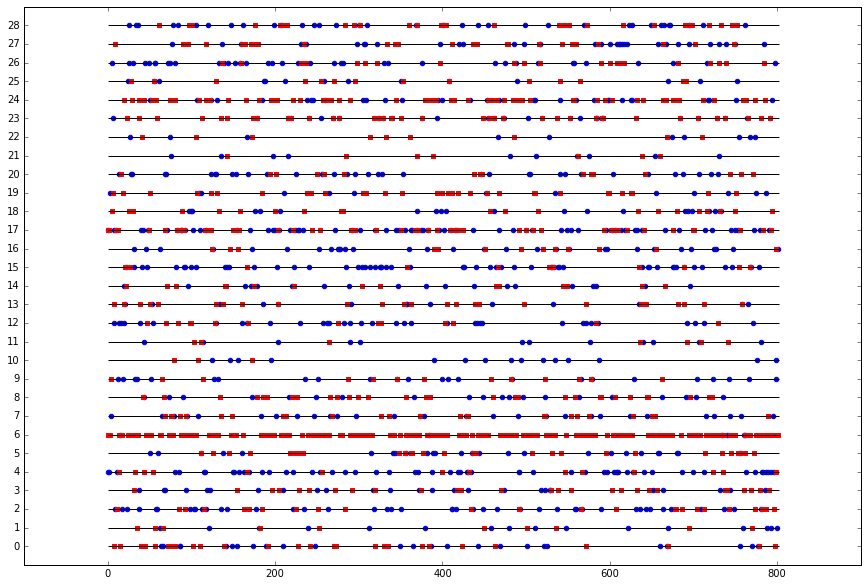

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-1, 29)
ax.hlines(np.arange(0,29), 0, 802)
plt.yticks(np.arange(0,29))
plt.scatter(np.arange(0,len(y)), y[:]-1, marker='o', color='blue')
plt.scatter(np.arange(0,len(y_km)), y_km[:], marker='s', color='red')
plt.show()

In [38]:
print("Distortion: %.2f" % km.inertia_)

Distortion: 9044.88


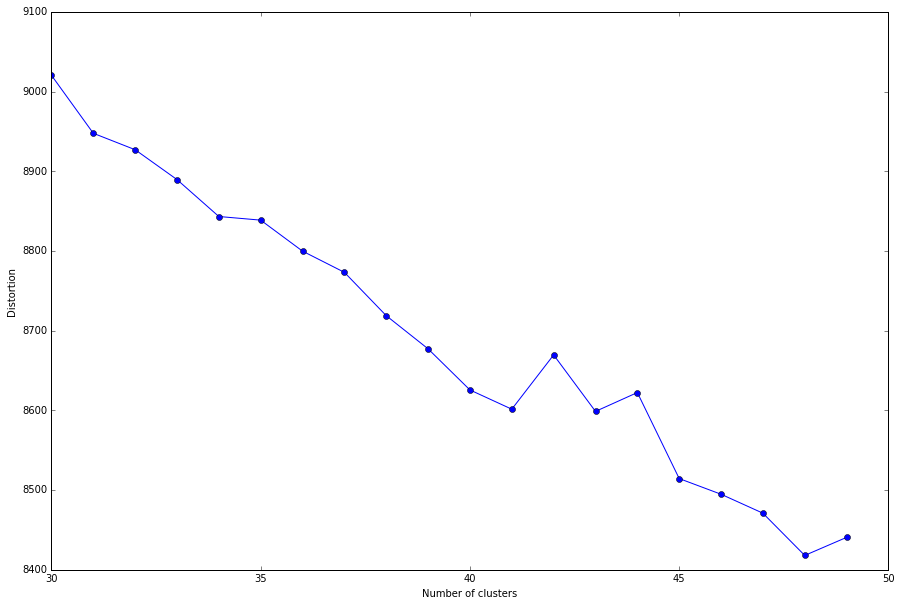

In [43]:
distortions = []
for i in range(30,50):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(30,50), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=29,
                            affinity='euclidean',
                            linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [ 0  0 13  2  0  6 22  0  6  0  0 24  0  0  0  6  9  0  0  0  9  0  0  0  0
  0  6  0 10  0  6  5  6  0  0  4  0  0  0  0  6  0  0  0  0  6  5  6 18  6
  0  0  4  0  0  0  6  8 23  0  0  0  0  0  6  0  8  0 13  0  0  0  6 25  6
  0 13 13  0  0  0  6 11  0  0 24  0 13  1  6  0  0  0  0  0  9  0 28  0  0
  5  0  6 18  0 11  0  0  0  2  6  0 18 21  7 24  0  0  0 13  0  0  0  0  0
  0  5  0  0  0 10  0  0  6 26 13 21  8  3  6  0  1 23  1  0  0  0  0  2 15
 13  0  0  6 16  1  0  0  6 12  0  0  0 24  0  0  0 20  0  0  0  0  5  0 21
 11 28 23  0 22  0  0 28 19  0  0 26  0  0  6  0  1  6  0  9  0  6  0 13 14
  6  9  0  0  7  0  0  0  6  0 13  0  0 13  5 21 13  0  0 22  0  0  0  1  0
 24  0  6  0  0  0 12  0  0  0  0  0 12  0  4  6 22  6  0 11  0  0  2 10  0
  0  0  0  8 13 22  0  0  0  9 13 13  0  0 18  0 26  5 13  0 10  6  0  6 26
  0  5 21  5  6  0  6  9  0  0  1  0  0 26  7  2  0  0  8  2  0 10 19 12  0
  0  7 18  0 11  0  1 14 12  0  0 26  4  4  0  2  0  0  0  6  0  0 12  0

In [47]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [51]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))


Estimated number of clusters: 65
Silhouette Coefficient: 0.032


In [58]:
from sklearn.cluster import Birch
birch_model = Birch(threshold=1.7, n_clusters=29)
y_birch = birch_model.fit(X)

In [59]:
y_birch.labels_

array([18,  8, 24, 13, 10,  0, 23,  9,  0,  7, 28, 16, 28, 14,  7,  0,  6,
       12, 23, 13,  6,  8, 11, 12, 13, 18,  0,  8, 26,  8,  0,  5,  3,  7,
       18, 13, 18,  8, 12,  9,  0,  1, 11, 15,  7,  0,  5,  6,  1,  2, 23,
        2, 13,  8,  6, 13,  0, 19, 12, 12,  9,  5, 14,  6,  3, 10, 13,  8,
       20,  8,  6,  1,  0, 15,  0,  8, 24, 20, 18, 13,  8,  0,  1, 16,  6,
       16,  3, 20,  3,  0, 21, 16, 28, 13,  5, 10, 21,  5,  6,  6,  5,  5,
        0, 13, 12,  1, 13, 23, 10, 13,  0,  4, 13, 17, 22, 16, 28,  7,  8,
       24, 13, 14,  8, 28, 23, 22,  5, 15,  6,  9, 26, 23, 14,  0, 11, 24,
       17, 19,  9,  0, 11,  3, 17,  3,  8,  1, 22, 13, 20,  2, 24, 28, 13,
        4,  2,  3, 22, 28,  0, 19, 21,  6, 18, 16, 21,  8,  6, 27,  6, 28,
        4, 21,  1, 10, 17,  1,  5,  7,  6, 25,  7,  8,  5, 13, 28, 23, 11,
       14, 13,  4,  8,  3,  0, 13,  6, 22, 13,  8, 13, 18,  0, 10,  1,  9,
       15,  2,  5, 18, 13,  5, 20, 13, 13, 24,  5, 17, 13, 15,  4, 25,  6,
        8, 28,  3,  2, 16

In [13]:
X.head()

,development aid,international co-operation,aid coordination,aid institutions,development agencies,needs assessment,terms of aid,foreign aid,international organisations,regional co-operation,...,foreign corporations,authority,appeal,award of contract,judgements,dispositions,parties,regulatory co-operation,trade costs,social media
JT03336861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03375495,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03376187,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
JT03328827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03319247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
np.ravel(y)

array([18,  5,  5, 20,  8, 27, 24, 13, 18,  3, 18,  5, 10, 13, 21,  7, 13,
        3, 10, 13, 15, 14, 16,  3, 26, 29, 27, 23, 21, 21, 27, 17, 16, 10,
       29, 10, 29,  4,  3, 13, 18, 16, 18, 12,  9, 27, 17, 16, 18, 27, 25,
        6, 10, 14, 13, 26, 27, 27,  3,  3,  6, 26,  2, 17,  1,  8,  1,  4,
        4, 21, 21, 18, 27,  9, 27, 23, 22, 28, 29,  8,  5, 27, 16, 18, 29,
        5,  1,  1, 18, 18,  9, 16, 18, 16,  4,  8, 15, 19,  3, 16, 19, 19,
       18,  3,  3, 16, 29, 25,  8, 20, 18,  6, 20,  3, 12,  5,  5,  3, 18,
        4, 29,  2,  4, 21, 25, 11, 17, 10, 21, 13, 21, 25, 10, 27, 14, 22,
        3, 28,  6, 27, 16,  1,  3, 16, 27, 16, 11, 29,  1, 21,  5,  5, 27,
       21, 18,  1, 11,  5, 27, 28, 13,  6, 29,  5, 15, 27, 13, 23, 21,  5,
       18, 15, 17,  9,  1, 16, 19,  3, 15, 24,  4,  2, 19,  8,  5, 25, 14,
       26, 26,  1, 21, 18, 27,  5, 13, 11, 27, 18, 22, 29, 18,  8, 16, 14,
       12, 18, 19, 29, 27,  1,  4, 20, 26,  5, 17, 24, 22,  9, 18, 24, 15,
        3,  5, 16, 18, 21

In [8]:
predicted = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X,np.ravel(y)).predict(X)

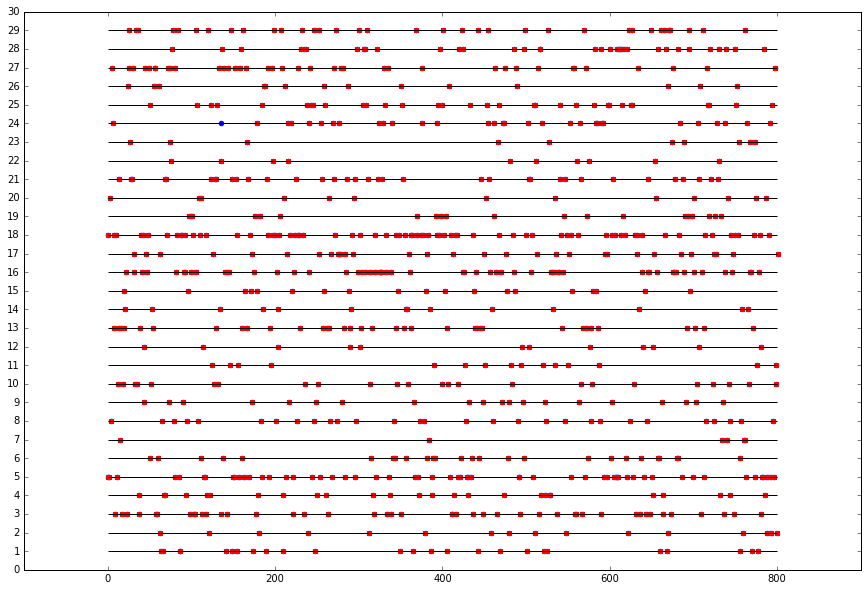

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0, 30)
ax.hlines(np.arange(0,31), 0, 800)
plt.yticks(np.arange(0,31))
plt.scatter(np.arange(0,len(predicted)), predicted[:], marker='o', color='blue')
plt.scatter(np.arange(0,len(y)), y[:], marker='s', color='red')
plt.show()

In [2]:
feature_vectors_df = pd.read_hdf(path_or_buf=os.path.join(output_folder, 'feature_vectors.hdf'))
feature_vectors_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6657,6658,6659,6660,6661,6662,6663,6664,6665,6666
JT00142962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IMP19992965ENG,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
JT00193235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03362486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT00170454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
feature_vectors_df.shape

(273333, 6667)

In [5]:
v = feature_vectors_df.sum(axis=0)
v = v[v == 0]
v.index

Int64Index([   0,   12,   22,   34,   41,   83,   91,  102,  103,  104,
            ...
            6314, 6349, 6376, 6396, 6413, 6447, 6463, 6481, 6537, 6563],
           dtype='int64', length=1094)

In [6]:
feature_vectors_df.drop(axis=1, labels=v.index[:], inplace=True)
feature_vectors_df.shape

(273333, 5573)

In [12]:
sample = feature_vectors_df[:10000]

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=28, 
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(sample)

In [16]:
y_km.shape

(10000,)